## MNIST 다운로드

In [7]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

## 데이터의 형태 확인하기

In [2]:
# 훈련 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


## 데이터 그려보기

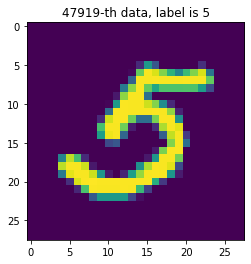

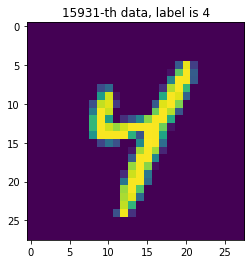

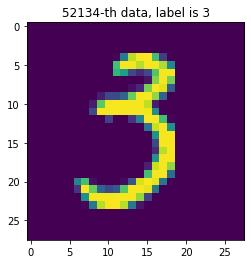

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx,label))

## 검증 데이터 만들기

In [8]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


## 모델 입력을 위한 데이터 전처리

In [6]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다.

(42000, 784)


## 모델 입력을 위한 레이블 전처리

In [5]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 모델 구성하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

## 소프트맥스와 시그모이드 값의 비교

In [11]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


## 학습과정 설정하기

In [7]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

## 모델 학습하기

In [8]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

W0928 15:31:14.036037 20628 deprecation.py:323] From C:\Users\jcy12\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.4959 - acc: 0.8622 - val_loss: 0.2366 - val_acc: 0.9337
Epoch 2/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.2041 - acc: 0.9399 - val_loss: 0.1816 - val_acc: 0.9482
Epoch 3/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.1543 - acc: 0.9554 - val_loss: 0.1613 - val_acc: 0.9547
Epoch 4/10
42000/42000 [==============================] - 1s 31us/sample - loss: 0.1261 - acc: 0.9641 - val_loss: 0.1476 - val_acc: 0.9562
Epoch 5/10
42000/42000 [==============================] - 1s 31us/sample - loss: 0.1063 - acc: 0.9696 - val_loss: 0.1336 - val_acc: 0.9621
Epoch 6/10
42000/42000 [==============================] - 1s 29us/sample - loss: 0.0904 - acc: 0.9734 - val_loss: 0.1288 - val_acc: 0.9623
Epoch 7/10
42000/42000 [==============================] - 1s 30us/sample - loss: 0.0781 - acc: 0.9767 - val_loss: 0.

## history를 통해 확인해볼 수 있는 값 출력하기

In [ ]:
history.history.keys()

## 학습 결과 그려보기

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 평가하기

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.1077 - acc: 0.9683


[0.10774137125271373, 0.9683]

## 학습된 모델을 통해 값 예측하기

In [ ]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')

## 예측값 그려서 확인해보기

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

## 모델 평가 방법 1 - 혼동 행렬

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## 모델 평가 방법 2 - 분류 보고서

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

## 전체 코드

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

# model.evaluate(x_test, y_test)
results = model.predict(x_test)